# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Sampling the - Above Dataset as it has huge Rows count

In [4]:
# generating one row 
rows = df.sample(frac =.25)
  
# checking if sample is 0.25 times data or not
  
if (0.25*(len(df))== len(rows)):
    print( "Frame")
    print(len(df), len(rows))
  

In [5]:
df.columns.value_counts().sum()

14

In [6]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15931,24,2017-07-16,2.02,75021.72,10041.65,24449.24,0.00,40530.83,40510.47,20.36,0.0,organic,2017,LosAngeles
11607,37,2015-04-12,1.58,6356.70,837.43,5183.14,0.00,336.13,106.12,230.01,0.0,organic,2015,Spokane
5866,38,2017-04-09,1.53,629799.49,5715.72,450287.22,3497.44,170299.11,149094.59,21204.52,0.0,conventional,2017,Boston
4790,6,2016-11-13,1.33,177641.28,81429.32,47266.81,4975.01,43970.14,43970.14,0.00,0.0,conventional,2016,RichmondNorfolk
9439,1,2015-12-20,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.0,organic,2015,California


so we have generated the 25% Sample of the above data which can be used for further Analysis

In [7]:
rows.shape

(4562, 14)

Checking for the null values in dataset

In [8]:
rows.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

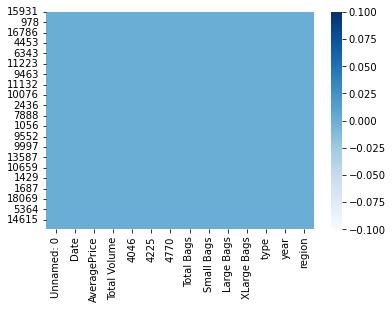

In [9]:
sns.heatmap(rows.isna(),cmap = 'Blues')

so we have no null values in our dataset 

statistical information

In [10]:
rows.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,4562.000000,4562.000000,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4.562000e+03,4562.000000,4562.000000
mean,23.862779,1.418777,8.179798e+05,2.827572e+05,2.780841e+05,2.215897e+04,2.349765e+05,1.761492e+05,5.596071e+04,2866.672626,2016.137659
std,15.497863,0.406281,3.394951e+06,1.246368e+06,1.147110e+06,1.051430e+05,9.860361e+05,7.347936e+05,2.573276e+05,16901.170875,0.937133
min,0.000000,0.520000,3.798200e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.110000,1.049451e+04,8.380825e+02,2.890775e+03,0.000000e+00,4.725958e+03,2.460628e+03,1.263775e+02,0.000000,2015.000000
50%,23.000000,1.390000,9.373278e+04,7.436420e+03,2.414888e+04,1.764250e+02,3.753743e+04,2.353809e+04,2.439010e+03,0.000000,2016.000000
75%,37.000000,1.680000,4.065356e+05,1.051833e+05,1.330818e+05,5.570727e+03,1.054418e+05,7.934221e+04,2.139144e+04,103.822500,2017.000000
max,52.000000,3.250000,6.250565e+07,2.162018e+07,2.044550e+07,1.993645e+06,1.937313e+07,1.338459e+07,5.719097e+06,387400.220000,2018.000000


so we can see that the dataset has -- high std deviation between the data as we have high std deviation at the column in Large Bags and X large Bags

as there is also the high chances that where the deviation is high there might be the also asymetrric or skewed. Also we can see that the 2nd quartile and the max value diffrences are also high so there are chances of Outliers

In [11]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 15931 to 5713
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4562 non-null   int64  
 1   Date          4562 non-null   object 
 2   AveragePrice  4562 non-null   float64
 3   Total Volume  4562 non-null   float64
 4   4046          4562 non-null   float64
 5   4225          4562 non-null   float64
 6   4770          4562 non-null   float64
 7   Total Bags    4562 non-null   float64
 8   Small Bags    4562 non-null   float64
 9   Large Bags    4562 non-null   float64
 10  XLarge Bags   4562 non-null   float64
 11  type          4562 non-null   object 
 12  year          4562 non-null   int64  
 13  region        4562 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 534.6+ KB


we have 3 categorical variable in the dataset
1-> Data
2-> Type 
3-> region 



In [12]:
# about the features in dataset

   # (1)  data of the observation 

#  (2) averageprice of the singe avacode

#  (3) total number of avacados sold

# (4) 4046 = total number of avacados with plu 4046 sold

# (5) 4225 = total number of avacados with plu 4225 sold

# (6) 4770 = total number of avacados with plu 4770 sold



In [13]:
rows.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
rows.nunique()

Unnamed: 0        53
Date             169
AveragePrice     232
Total Volume    4560
4046            4472
4225            4540
4770            3100
Total Bags      4551
Small Bags      4425
Large Bags      3791
XLarge Bags     1446
type               2
year               4
region            54
dtype: int64

# Exploration of the Dataset (EDA

univariable analysis

In [15]:
rows['type'].value_counts()

organic         2362
conventional    2200
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

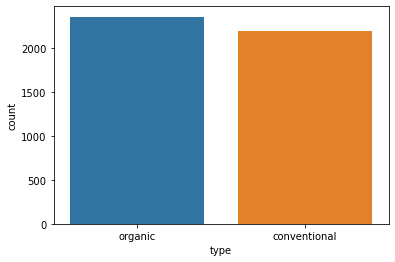

In [16]:
sns.countplot(rows.type)

In [17]:
rows['year'].value_counts()

2016    1436
2015    1410
2017    1394
2018     322
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

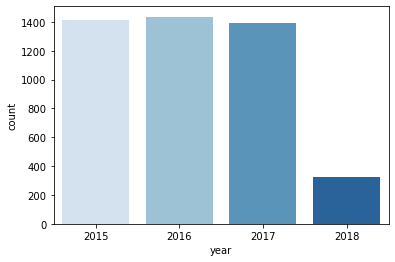

In [18]:
sns.countplot(rows.year,palette='Blues')

In 2018 we can less data compared to other years

In [19]:
rows['region'].value_counts()

Nashville              105
Southeast               99
MiamiFtLauderdale       98
Boise                   97
RaleighGreensboro       97
CincinnatiDayton        95
Chicago                 95
Houston                 95
NewYork                 91
NewOrleansMobile        91
SouthCarolina           90
West                    90
Sacramento              90
SanFrancisco            89
BuffaloRochester        89
Detroit                 89
Orlando                 88
Philadelphia            88
Boston                  88
Seattle                 88
HarrisburgScranton      87
Portland                86
California              86
SanDiego                85
Denver                  85
GrandRapids             85
BaltimoreWashington     84
Tampa                   84
LasVegas                84
Indianapolis            83
Spokane                 83
Pittsburgh              83
TotalUS                 83
DallasFtWorth           82
NorthernNewEngland      81
HartfordSpringfield     81
LosAngeles              80
C

<AxesSubplot:xlabel='region'>

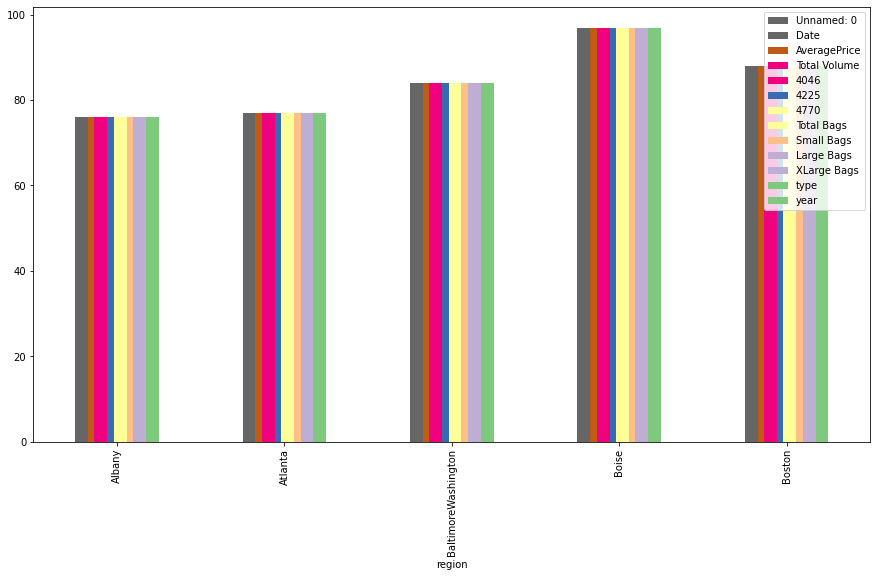

In [20]:
rows.groupby(['region']).count().head().plot(kind='bar',figsize=(15,8),cmap='Accent_r')

First 25 regions

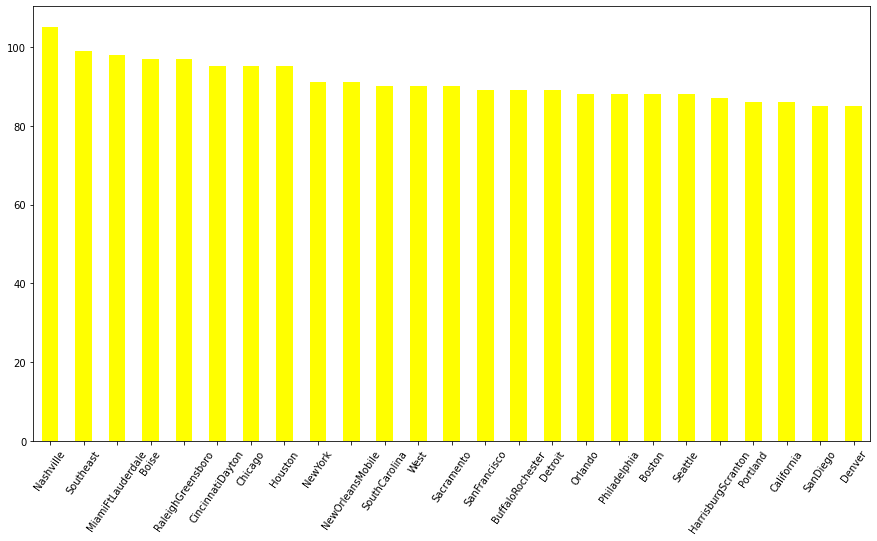

In [21]:
plt.figure(figsize=(15,8))
rows.region.value_counts(ascending=False).head(25).plot(kind='bar', color='yellow');
plt.xticks(rotation=55);

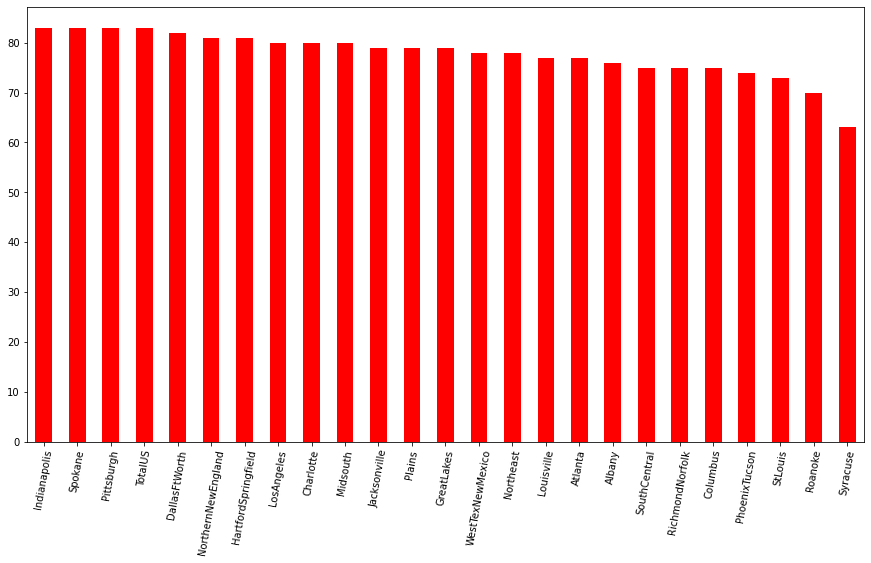

In [22]:
plt.figure(figsize=(15,8))
rows.region.value_counts(ascending=False).tail(25).plot(kind='bar',color='red');
plt.xticks(rotation=80);

There is equal amount of data in every column except WestTexNewMexico

Type has 2 unique values (conventional, organic)

Year has 4 unique values which are of discrete type(2015,2016,2017,2018)

region has 54 unique values

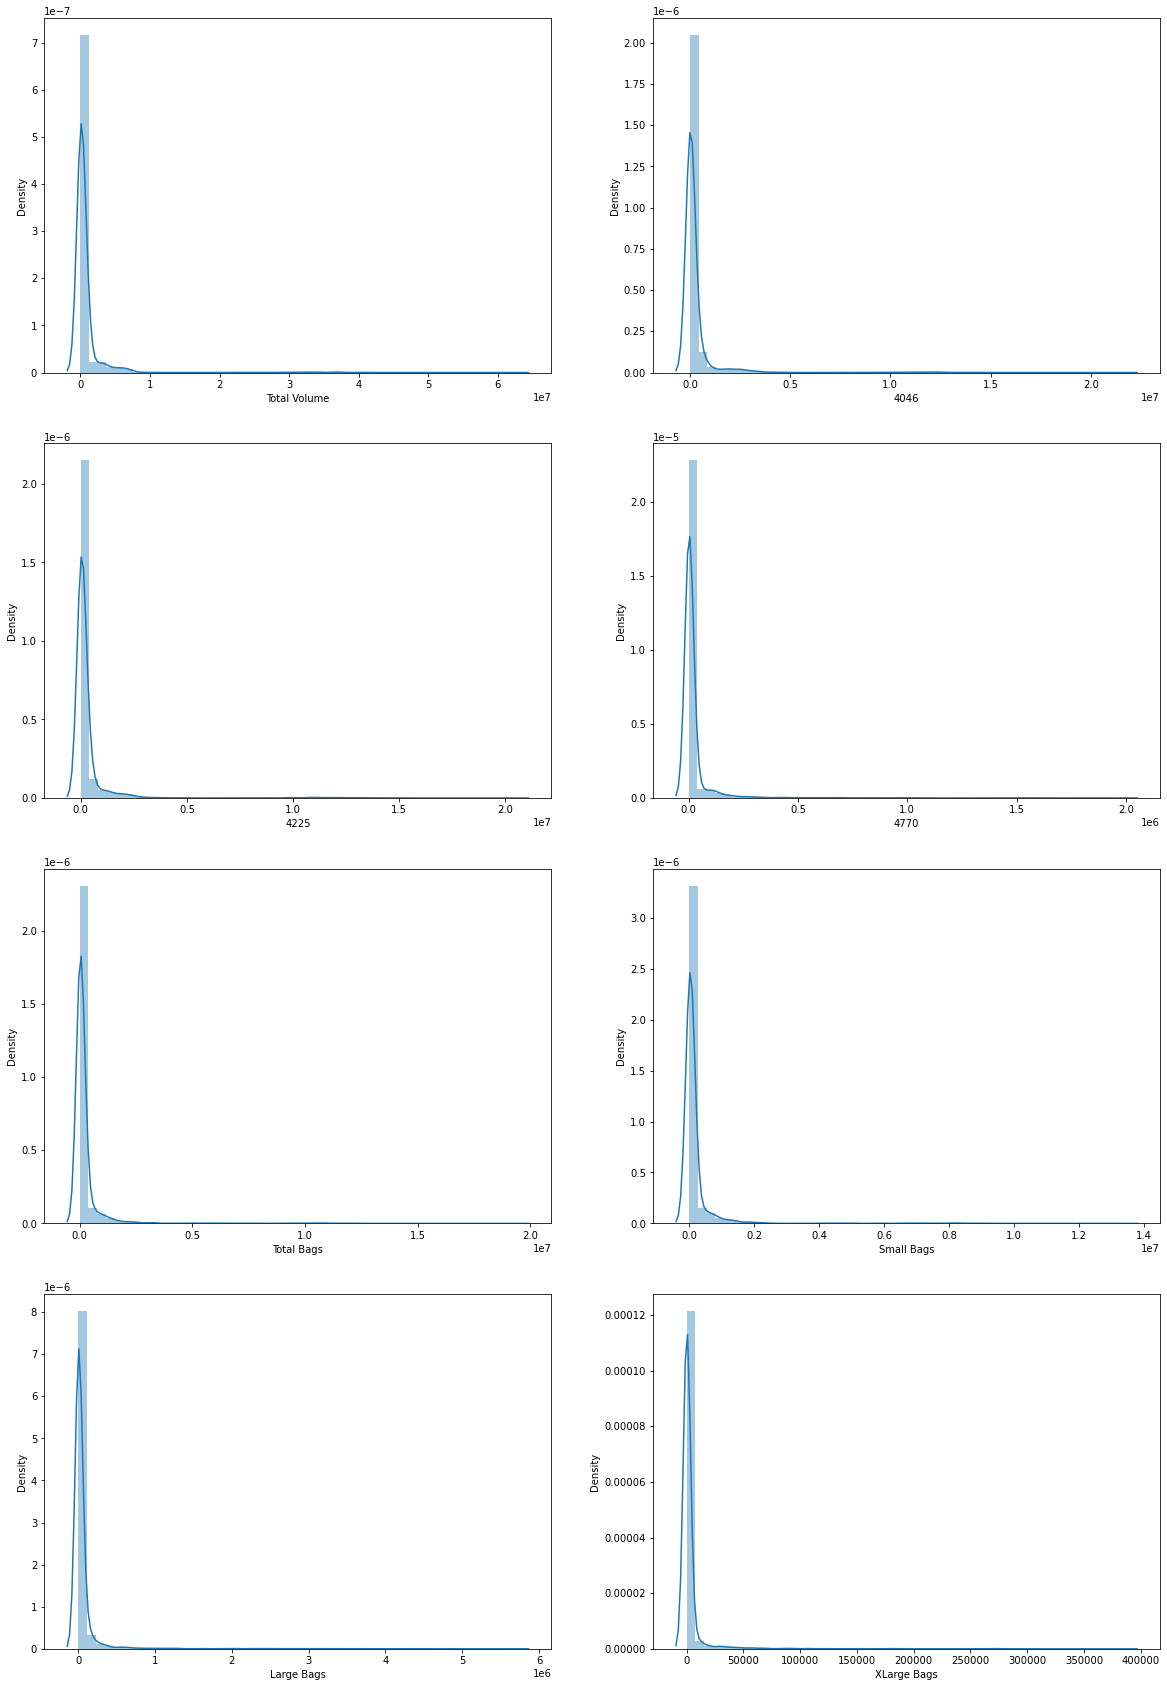

In [23]:
num_cols = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(20,30),facecolor='white')
plotnum = 1
for i in num_cols:
    if plotnum <=10:
        plt.subplot(4,2,plotnum)
        sns.distplot(rows[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

Total Volume,4046,4225,4770 has the binomial distribution.


Total Bags,Small bags,Large Bags, XLarge Bags has the skewness presentin it.

Comparision of year and 4046,4225,4770

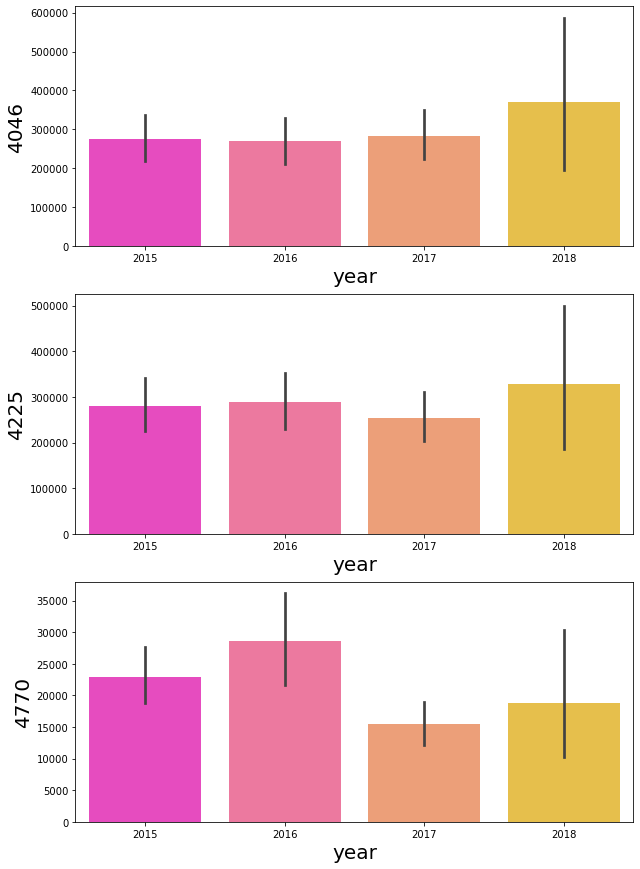

In [24]:
y_cols =rows[['4046','4225','4770']]
x_cols =rows['year']
plt.figure(figsize=(10,15),facecolor='white',edgecolor='b')
plotnumber = 1
for cols in y_cols:
    plt.subplot(3,1,plotnumber)
    sns.barplot(x_cols,y_cols[cols],palette='spring')
    plt.xlabel('year',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnumber+=1
plt.show()    

PLU 4046 has grown over the 4 years

compared to PLU-4225 production PLU-4046 is more

PLU-4770 is least produced

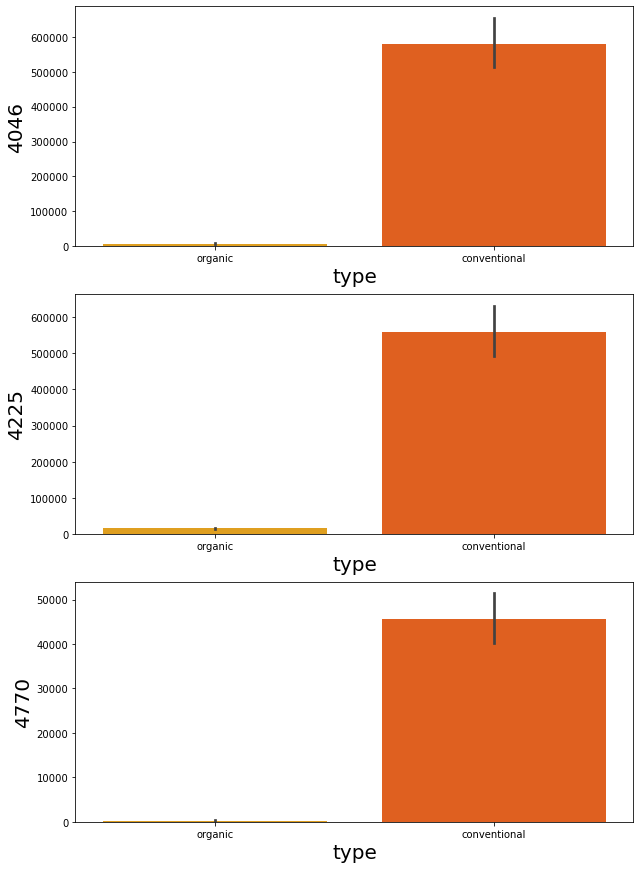

In [25]:
y_cols = rows[['4046','4225','4770']]
x_cols = rows['type']
plt.figure(figsize=(10,15),facecolor='white')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='autumn_r')
    plt.xlabel('type',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

Production of conventional_type is more in cases 4046,4225,4770.

By this we can say less production high demand the organic rates we can assume as higher

Comparision of avaerage prices in different years

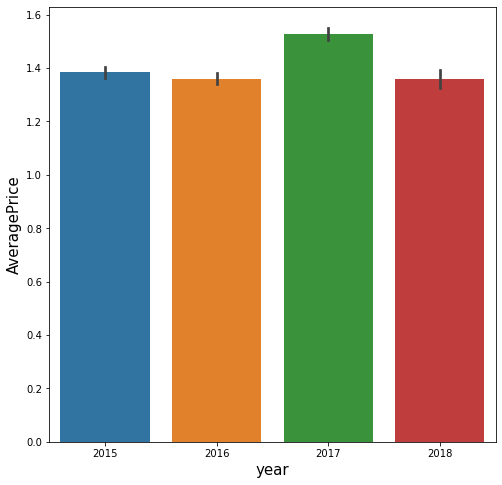

In [26]:
y_cols = rows['AveragePrice']
x_cols = rows[['year']]
plt.figure(figsize=(8,8),facecolor='white')
plotnum = 1
for cols in x_cols:
    plt.subplot(1,1,plotnum)
    sns.barplot(x_cols[cols],y_cols)
    plt.xlabel(cols,fontsize=15)
    plt.ylabel('AveragePrice',fontsize=15)
    plotnum+=1
plt.show()

From this graph we can say that there is more avarage price in 2017 years

<AxesSubplot:xlabel='year'>

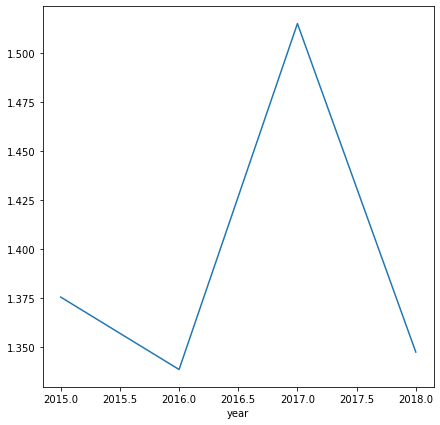

In [27]:
plt.figure(figsize=(7,7))
df.groupby('year')['AveragePrice'].mean().plot(kind='line')

There is some dip in AveragePrice in 2016 and hike in AveragePrice in 2017

In [28]:
# Values of the year and average price
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [29]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

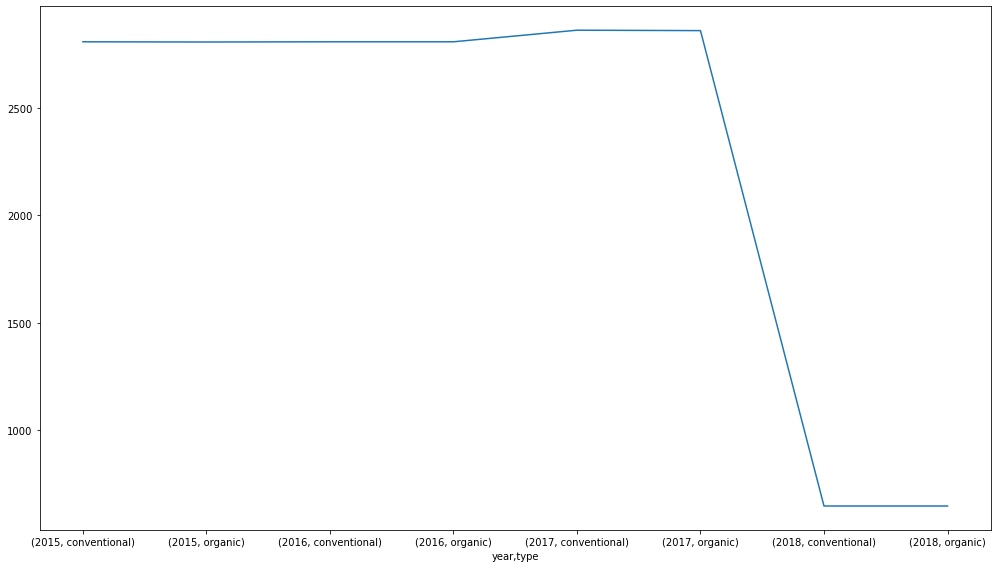

In [30]:
plt.figure(figsize=(14,8))
df.groupby('year')['type'].value_counts().plot()
plt.tight_layout()

2018 there is less production in convetional and organic types

# *Extracting Date and month from Date feature not creating year because it is already present in dataset*

In [31]:
rows['Date'] = pd.to_datetime(rows['Date'])     # changing the object type to datetime type
rows['Day'] = rows['Date'].apply(lambda d:d.day)# Extracting the date and adding to df
rows['Month'] = rows['Date'].apply(lambda m:m.month)#Extracting month and adding to df

In [32]:
rows.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
15931,24,2017-07-16,2.02,75021.72,10041.65,24449.24,0.00,40530.83,40510.47,20.36,0.0,organic,2017,LosAngeles,16,7
11607,37,2015-04-12,1.58,6356.70,837.43,5183.14,0.00,336.13,106.12,230.01,0.0,organic,2015,Spokane,12,4
5866,38,2017-04-09,1.53,629799.49,5715.72,450287.22,3497.44,170299.11,149094.59,21204.52,0.0,conventional,2017,Boston,9,4
4790,6,2016-11-13,1.33,177641.28,81429.32,47266.81,4975.01,43970.14,43970.14,0.00,0.0,conventional,2016,RichmondNorfolk,13,11
9439,1,2015-12-20,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.0,organic,2015,California,20,12


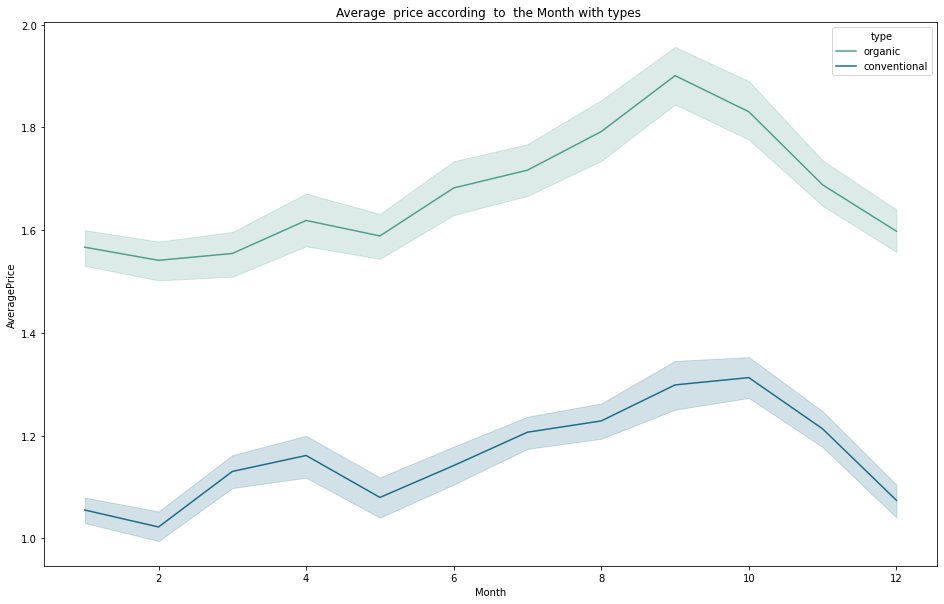

In [33]:
plt.figure(figsize=(16,10),facecolor='white')
sns.lineplot(x='Month',y='AveragePrice', hue = 'type',data=rows, palette='crest')
plt.title('Average  price according  to  the Month with types ')
plt.show()

There is hike in 8-10 th month for both organic and conventional types

# Dropping some of the columns


Observation:
As we observe the sum of 4046,4225,4770,Total Bags is Total Volume Column
The sum of Small Bags,Large Bags,XLarge Bags is Total Bags feature

In [34]:
rows.drop(columns=['Date','Total Volume','Total Bags'],inplace=True,axis=1)
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
15931,24,2.02,10041.65,24449.24,0.00,40510.47,20.36,0.0,organic,2017,LosAngeles,16,7
11607,37,1.58,837.43,5183.14,0.00,106.12,230.01,0.0,organic,2015,Spokane,12,4
5866,38,1.53,5715.72,450287.22,3497.44,149094.59,21204.52,0.0,conventional,2017,Boston,9,4
4790,6,1.33,81429.32,47266.81,4975.01,43970.14,0.00,0.0,conventional,2016,RichmondNorfolk,13,11
9439,1,1.35,12746.47,48195.95,1.52,25535.80,13313.81,0.0,organic,2015,California,20,12


In [35]:
rows.columns.value_counts().sum()

13

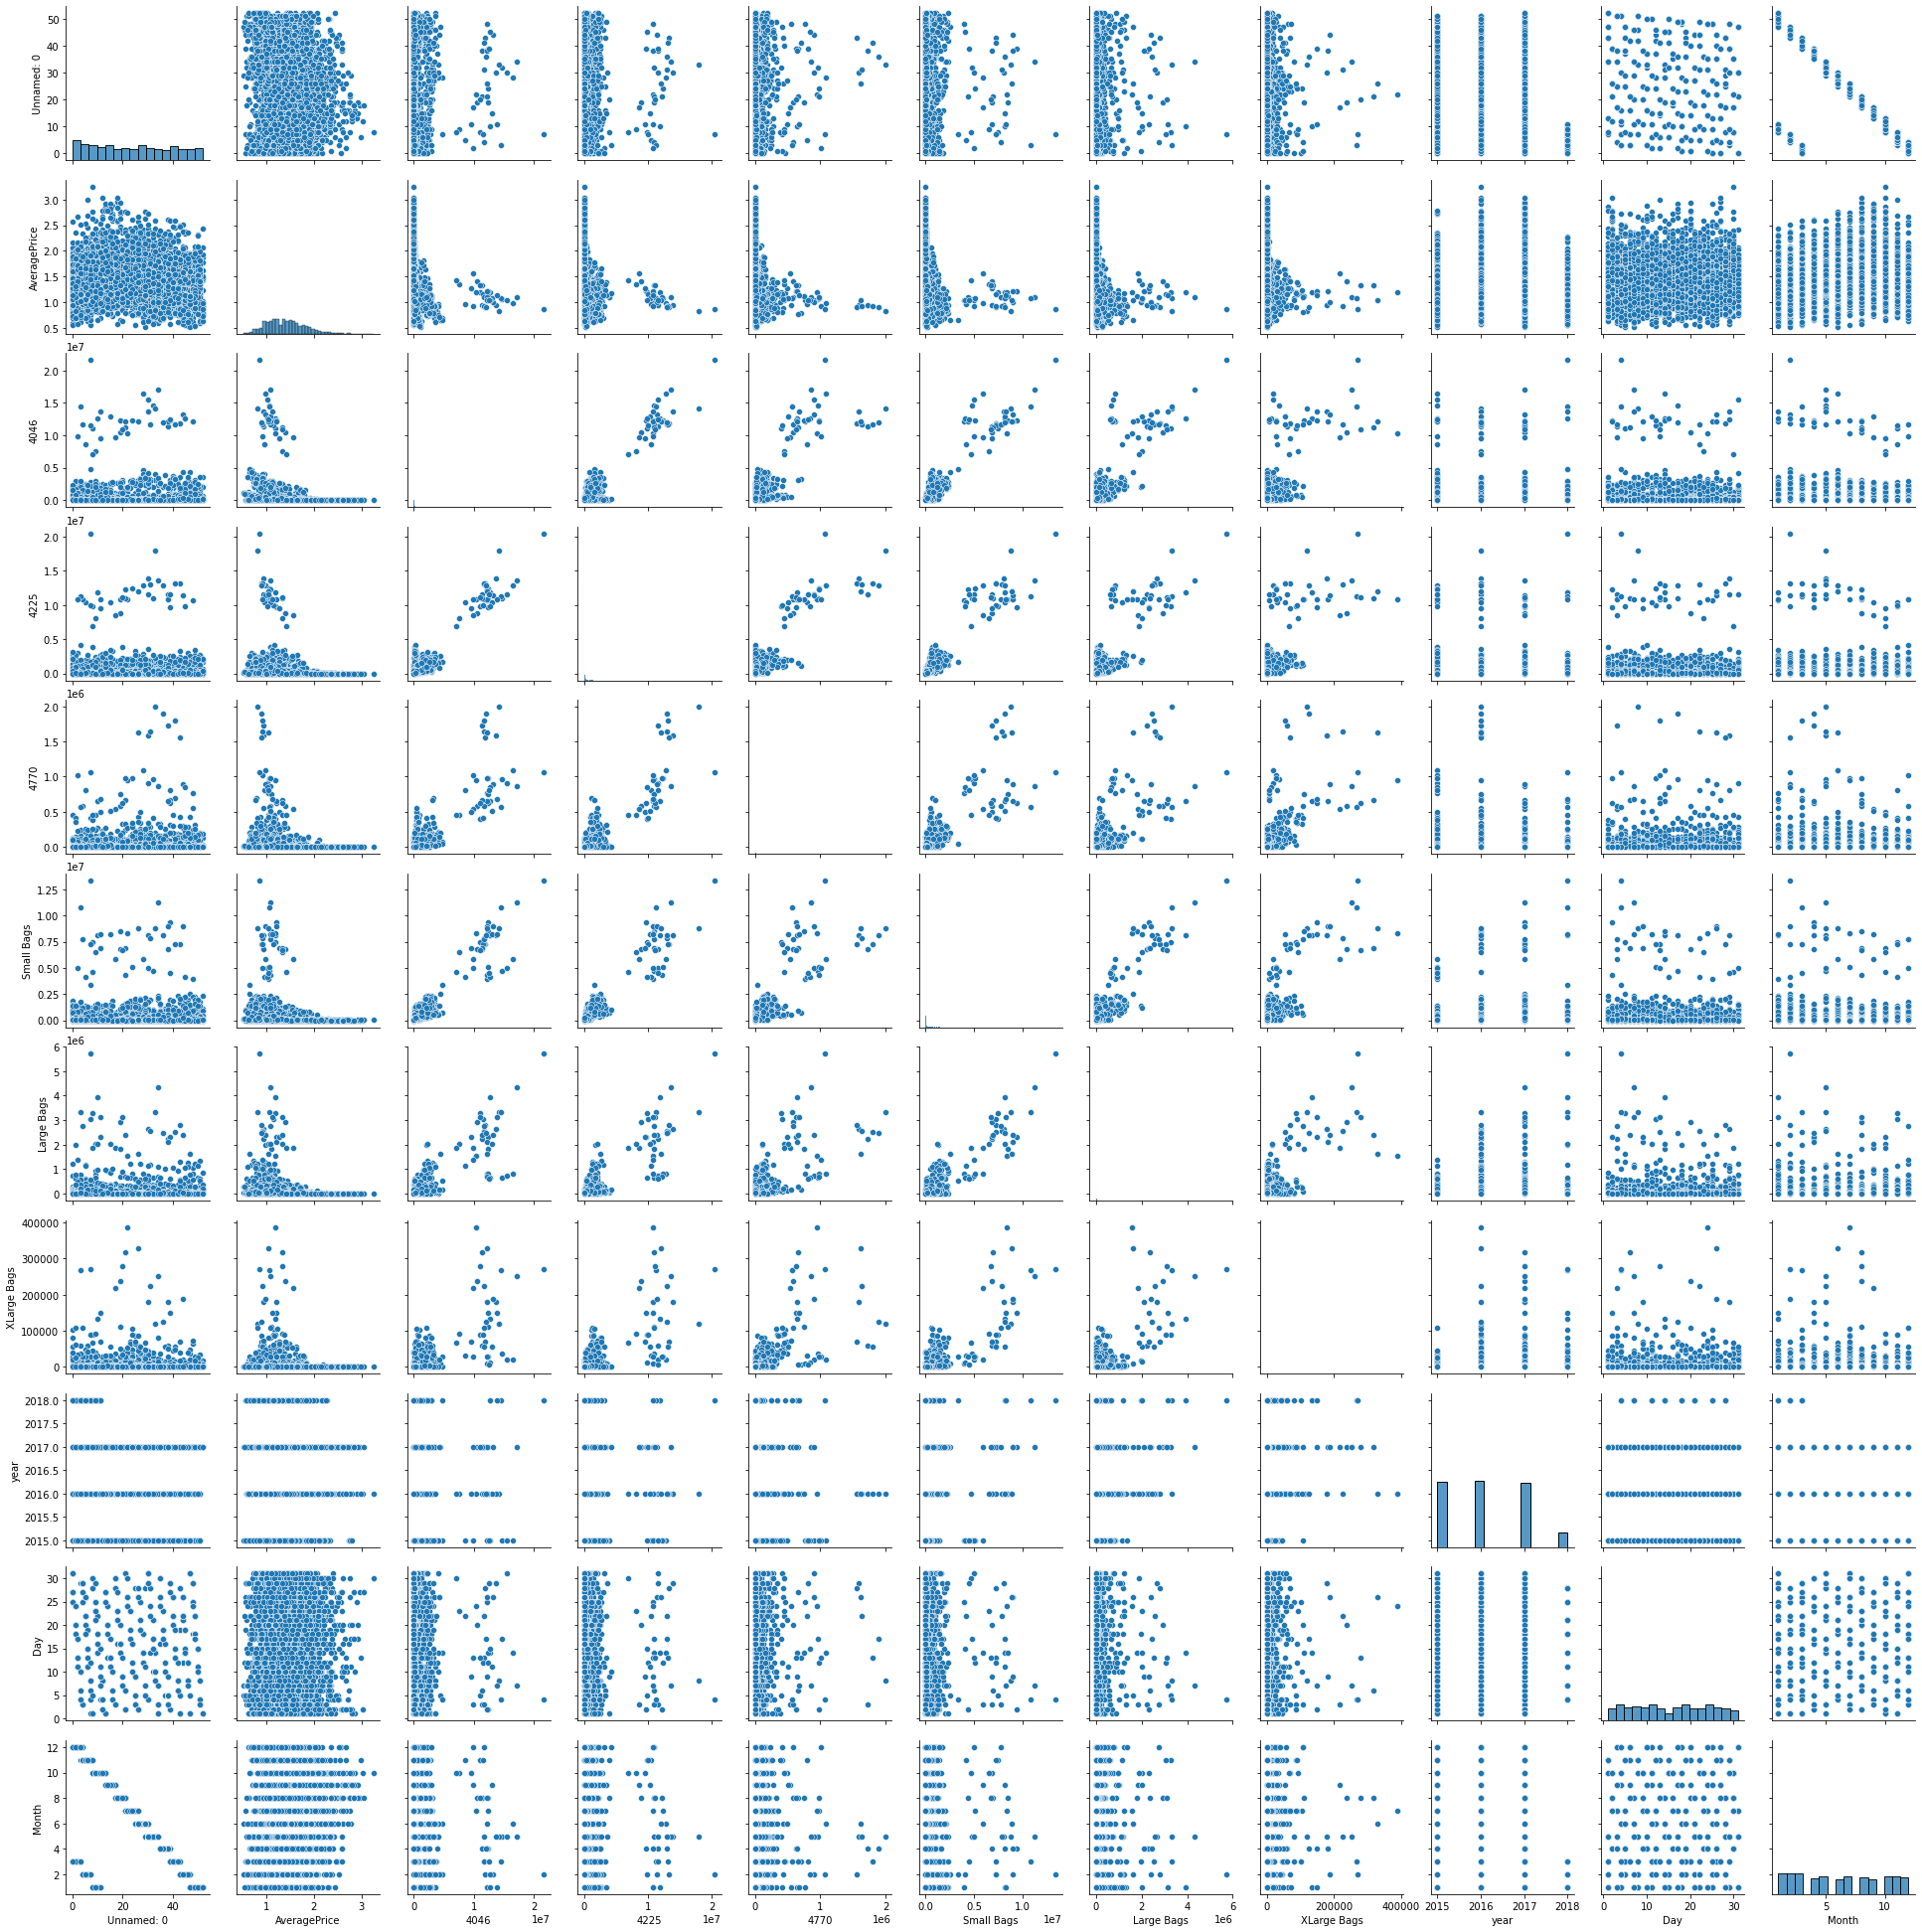

In [36]:
sns.pairplot(rows)

Checking for the Outliers in the Dataset

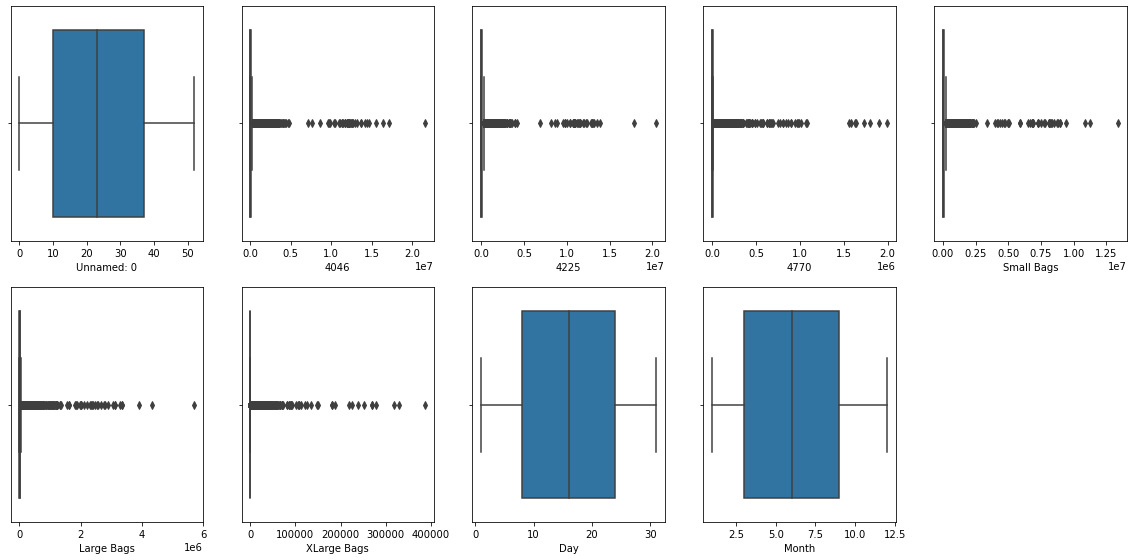

In [37]:
# finding outliers in the data set
def check_outliers(data_f):
    plt.figure(figsize=(20,25),facecolor='white')
    plotnumber = 1
    for feature in data_f.drop(columns=['year','type','region','AveragePrice'],axis=1):
        if plotnumber<=16:
            plt.subplot(5,5,plotnumber)
            sns.boxplot(data_f[feature])
            plt.xlabel(feature)
        plotnumber+=1
    plt.show()        
check_outliers(rows)            

            

Each column here has the ouliers except Day and Month

# Checking  skewness

In [38]:
rows.skew()

Unnamed: 0       0.136067
AveragePrice     0.561387
4046             9.011029
4225             9.297648
4770            10.717272
Small Bags       9.714853
Large Bags      10.337475
XLarge Bags     12.681401
year             0.238241
Day              0.014524
Month            0.077821
dtype: float64

Checking  correlation

In [39]:
rows.corr()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,1.000000,-0.122095,0.015417,0.013672,0.037896,-0.001885,-0.006995,-0.017946,-0.184141,-0.102778,-0.779843
AveragePrice,-0.122095,1.000000,-0.207891,-0.177727,-0.180596,-0.177490,-0.178928,-0.113027,0.092740,0.013598,0.152306
4046,0.015417,-0.207891,1.000000,0.934728,0.831981,0.938038,0.844828,0.714348,0.012384,-0.018660,-0.026786
4225,0.013672,-0.177727,0.934728,1.000000,0.884482,0.943071,0.833296,0.730363,-0.000470,-0.016179,-0.020664
4770,0.037896,-0.180596,0.831981,0.884482,1.000000,0.826818,0.710157,0.685444,-0.028026,0.005202,-0.033748
Small Bags,-0.001885,-0.177490,0.938038,0.943071,0.826818,1.000000,0.897561,0.813451,0.064977,-0.017608,-0.022118
Large Bags,-0.006995,-0.178928,0.844828,0.833296,0.710157,0.897561,1.000000,0.714093,0.092100,-0.026226,-0.025028
XLarge Bags,-0.017946,-0.113027,0.714348,0.730363,0.685444,0.813451,0.714093,1.000000,0.085340,-0.011611,-0.009885
year,-0.184141,0.092740,0.012384,-0.000470,-0.028026,0.064977,0.092100,0.085340,1.000000,0.009094,-0.165714
Day,-0.102778,0.013598,-0.018660,-0.016179,0.005202,-0.017608,-0.026226,-0.011611,0.009094,1.000000,0.031397


<AxesSubplot:>

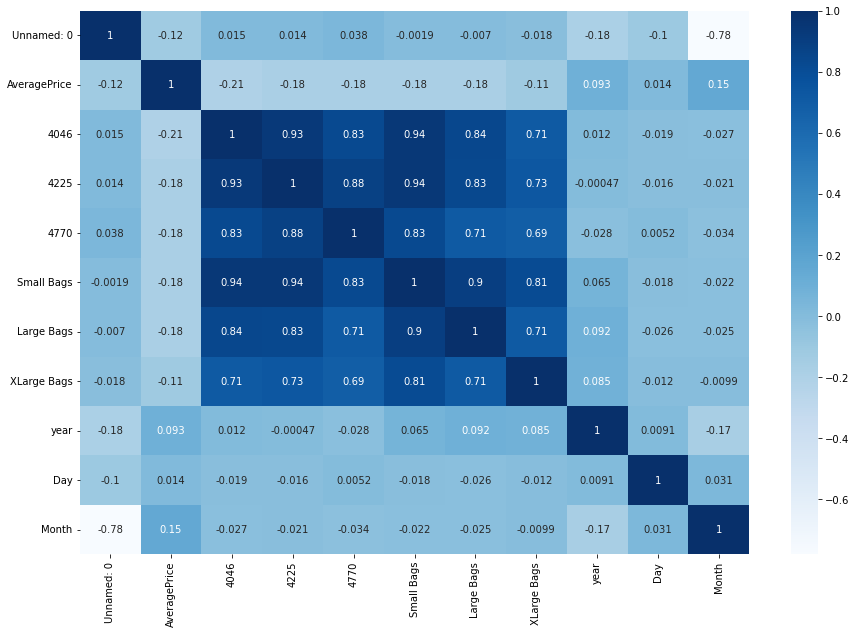

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.corr(), annot=True, cmap='Blues')

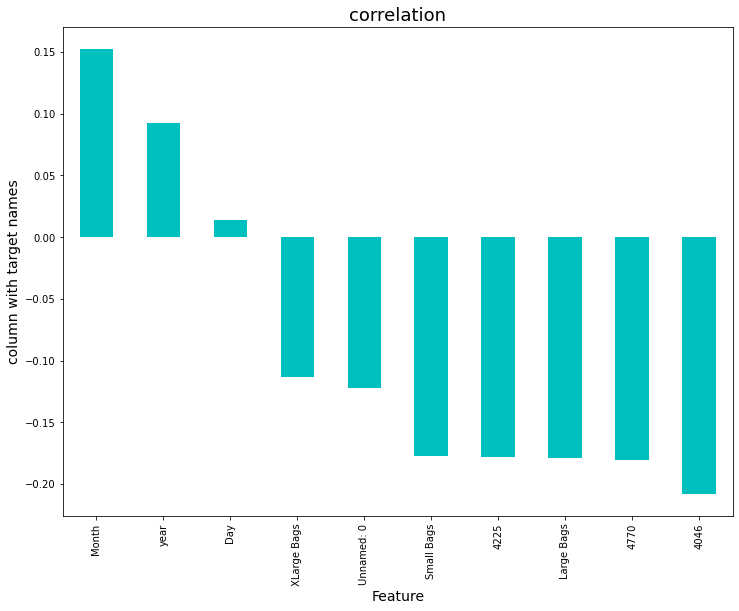

In [41]:
plt.figure(figsize=(12,9))
rows.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


so we can see that - X kargebags , 4225,4770,Large bags,Small bags, 4046 having negative or are in inversly propotional in the Dataset

In [42]:
rows.cov()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
Unnamed: 0,240.183754,-0.768771,2.977974e+05,2.430574e+05,6.175057e+04,-2.147040e+04,-2.789772e+04,-4.700617e+03,-2.674375,-14.009719,-42.729300
AveragePrice,-0.768771,0.165064,-1.052712e+05,-8.282949e+04,-7.714639e+03,-5.298656e+04,-1.870645e+04,-7.761177e+02,0.035310,0.048592,0.218772
4046,297797.368424,-105271.214666,1.553433e+12,1.336400e+12,1.090284e+11,8.590772e+11,2.709574e+11,1.504779e+10,14464.818663,-204559.488074,-118030.999882
4225,243057.356294,-82829.486897,1.336400e+12,1.315861e+12,1.066778e+11,7.949044e+11,2.459749e+11,1.415991e+10,-505.560240,-163239.223173,-83805.120657
4770,61750.565920,-7714.638579,1.090284e+11,1.066778e+11,1.105505e+10,6.387865e+10,1.921416e+10,1.218062e+09,-2761.436648,4810.786364,-12545.001303
Small Bags,-21470.396739,-52986.559661,8.590772e+11,7.949044e+11,6.387865e+10,5.399217e+11,1.697133e+11,1.010215e+10,44743.387161,-113800.785299,-57457.869139
Large Bags,-27897.716573,-18706.452723,2.709574e+11,2.459749e+11,1.921416e+10,1.697133e+11,6.621749e+10,3.105687e+09,22209.850260,-59357.835196,-22769.817638
XLarge Bags,-4700.616695,-776.117650,1.504779e+10,1.415991e+10,1.218062e+09,1.010215e+10,3.105687e+09,2.856496e+08,1351.669739,-1725.942562,-590.678099
year,-2.674375,0.035310,1.446482e+04,-5.055602e+02,-2.761437e+03,4.474339e+04,2.220985e+04,1.351670e+03,0.878218,0.074960,-0.549044
Day,-14.009719,0.048592,-2.045595e+05,-1.632392e+05,4.810786e+03,-1.138008e+05,-5.935784e+04,-1.725943e+03,0.074960,77.360019,0.976323


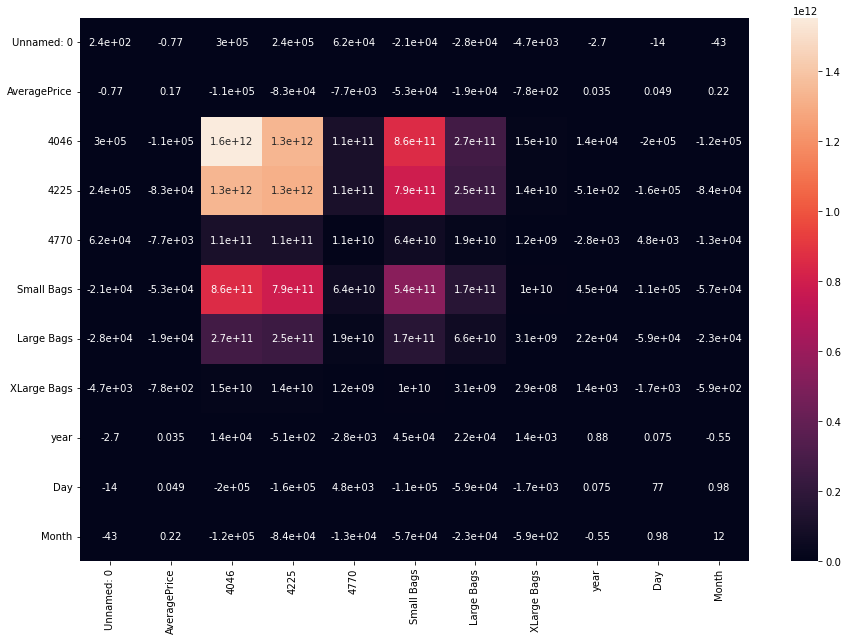

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(rows.cov(), annot=True)
plt.show()

# Data Cleaning and preprocessing

Encoding the columns

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['type','region']
#
# Encode labels of multiple columns at once
#
rows[cols] = rows[cols].apply(LabelEncoder().fit_transform)

In [45]:
rows.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
15931,24,2.02,10041.65,24449.24,0.00,40510.47,20.36,0.0,1,2017,22,16,7
11607,37,1.58,837.43,5183.14,0.00,106.12,230.01,0.0,1,2015,47,12,4
5866,38,1.53,5715.72,450287.22,3497.44,149094.59,21204.52,0.0,0,2017,4,9,4
4790,6,1.33,81429.32,47266.81,4975.01,43970.14,0.00,0.0,0,2016,38,13,11
9439,1,1.35,12746.47,48195.95,1.52,25535.80,13313.81,0.0,1,2015,6,20,12


Removing outliers using z-score method

In [46]:
#using zscore to remove the outliers in the feature 
from scipy .stats import zscore

z= np.abs(zscore(rows))

new_avd = rows[(z<3).all(axis=1)]
new_avd

,Unnamed: 0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
15931,24,2.02,10041.65,24449.24,0.00,40510.47,20.36,0.00,1,2017,22,16,7
11607,37,1.58,837.43,5183.14,0.00,106.12,230.01,0.00,1,2015,47,12,4
5866,38,1.53,5715.72,450287.22,3497.44,149094.59,21204.52,0.00,0,2017,4,9,4
4790,6,1.33,81429.32,47266.81,4975.01,43970.14,0.00,0.00,0,2016,38,13,11
9439,1,1.35,12746.47,48195.95,1.52,25535.80,13313.81,0.00,1,2015,6,20,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14882,35,2.15,1412.92,11979.18,192.69,12103.86,8.23,0.00,1,2017,2,30,4
3755,11,0.98,483285.47,344448.92,9670.82,121027.64,116836.20,34.72,0,2016,18,9,10
6679,3,1.01,95942.65,11557.82,257.60,33265.86,40251.73,150.00,0,2017,20,10,12
12517,12,1.42,14245.66,441.23,0.00,5673.89,335.74,0.00,1,2016,11,2,10


In [47]:
rows.shape

(4562, 13)

In [48]:
new_avd.shape

(4419, 13)

checkong of loss from zscore method

In [49]:
## lets check the loss of data 
data_loss = (4562-4418)/4582*100
print('The Data_loss from zscore is :',data_loss)


The Data_loss from zscore is : 3.1427324312527283


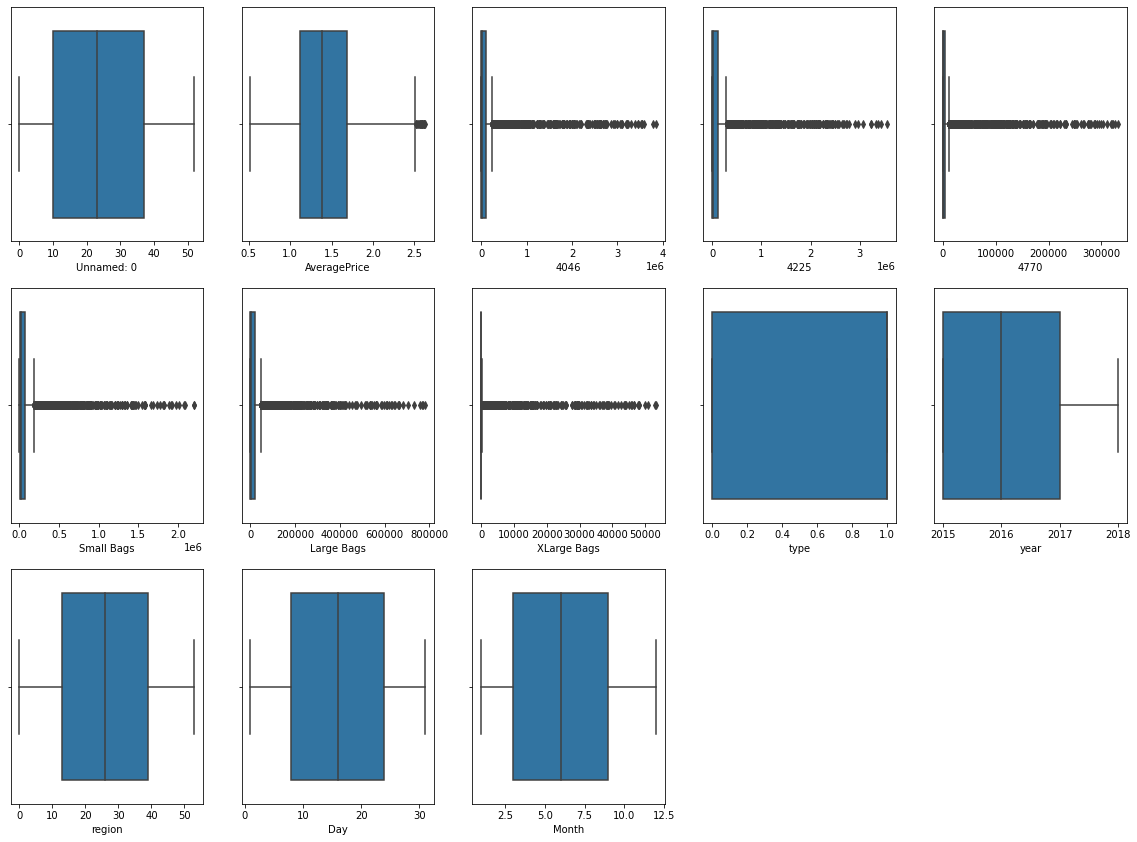

In [50]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for feature in new_avd:
    if plotnum <= 16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(new_avd[feature])
        plt.xlabel(feature)
    plotnum+=1
plt.show()

Diving the dataset into x and y before Transformation

In [51]:
x = new_avd.drop(['AveragePrice'],axis=1)
y = new_avd.iloc[:,0]

# Removing a Skewness by powertransform

In [52]:
from sklearn.preprocessing import power_transform

In [53]:
x = power_transform(x,method='yeo-johnson')

In [54]:
x

array([[ 0.15188706,  0.06022514,  0.06364497, ..., -0.14839591,
         0.11115313,  0.2987812 ],
       [ 0.85688364, -0.68801782, -0.50564183, ...,  1.28641016,
        -0.3397366 , -0.55484097],
       [ 0.90674324, -0.11754356,  1.34757566, ..., -1.53668235,
        -0.70361746, -0.55484097],
       ...,
       [-1.49261125,  0.82299991, -0.22029248, ..., -0.27940543,
        -0.57934826,  1.47934404],
       [-0.6487164 ,  0.17301624, -1.27404079, ..., -0.92384483,
        -1.71554437,  1.03311953],
       [ 1.19583093,  1.24446983,  0.38166989, ..., -1.87770462,
         1.12737703, -1.24305367]])

so now we have transform a data using by power transform 

In [55]:
x = pd.DataFrame(x)

In [56]:
x.skew()

0    -0.239188
1    -0.033501
2    -0.039686
3     0.032898
4    -0.022677
5    -0.104616
6     0.885369
7    -0.110184
8     0.247218
9    -0.249567
10   -0.207844
11   -0.153034
dtype: float64

In [57]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.151887,0.060225,0.063645,-1.215787,0.365778,-1.083054,-0.666235,0.946442,0.928032,-0.148396,0.111153,0.298781
1,0.856884,-0.688018,-0.505642,-1.215787,-1.738996,-0.554721,-0.666235,0.946442,-1.205252,1.286410,-0.339737,-0.554841
2,0.906743,-0.117544,1.347576,0.843182,1.015369,0.799924,-0.666235,-1.056589,0.928032,-1.536682,-0.703617,-0.554841
3,-1.165290,0.764714,0.328167,0.925750,0.404238,-1.621519,-0.666235,-1.056589,-0.137684,0.803399,-0.223801,1.259859
4,-1.771515,0.136944,0.336196,-0.967841,0.154865,0.634952,-0.666235,0.946442,-1.205252,-1.344621,0.533398,1.479344
...,...,...,...,...,...,...,...,...,...,...,...,...
4414,0.755566,-0.537932,-0.207112,0.145759,-0.166803,-1.244966,-0.666235,0.946442,0.928032,-1.753477,1.502971,-0.554841
4415,-0.726814,1.423069,1.216402,1.080152,0.905751,1.464503,1.168744,-1.056589,-0.137684,-0.414131,-0.703617,1.033120
4416,-1.492611,0.823000,-0.220292,0.216982,0.274562,1.038180,1.426029,-1.056589,0.928032,-0.279405,-0.579348,1.479344
4417,-0.648716,0.173016,-1.274041,-1.215787,-0.470084,-0.460751,-0.666235,0.946442,-0.137684,-0.923845,-1.715544,1.033120


once again checking a skewness

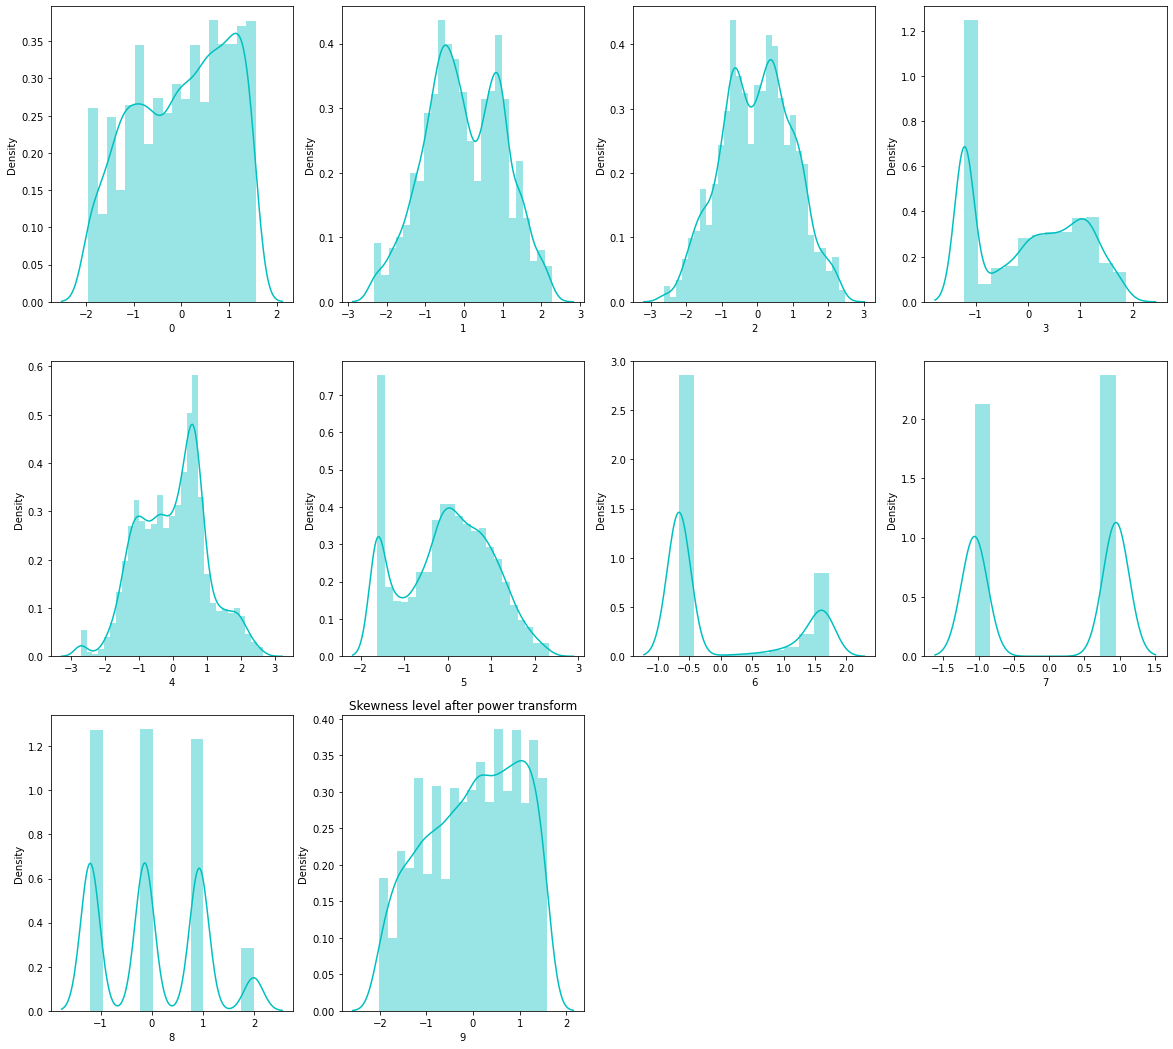

In [58]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for i in x[[0,1,2,3,4,5,6,7,8,9,10]]:
    if plotnumber<=10:
        plt.subplot(4,4,plotnumber)
        sns.distplot(x[i],color='c')
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.title('Skewness level after power transform')
plt.show()

so now we can see data is diatributed in noraml form , skewness has removed from data 

In [59]:
new_avd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4419 entries, 15931 to 5713
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4419 non-null   int64  
 1   AveragePrice  4419 non-null   float64
 2   4046          4419 non-null   float64
 3   4225          4419 non-null   float64
 4   4770          4419 non-null   float64
 5   Small Bags    4419 non-null   float64
 6   Large Bags    4419 non-null   float64
 7   XLarge Bags   4419 non-null   float64
 8   type          4419 non-null   int32  
 9   year          4419 non-null   int64  
 10  region        4419 non-null   int32  
 11  Day           4419 non-null   int64  
 12  Month         4419 non-null   int64  
dtypes: float64(7), int32(2), int64(4)
memory usage: 448.8 KB


# standard scaler

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

In [62]:
scaled_x

array([[ 0.15188706,  0.06022514,  0.06364497, ..., -0.14839591,
         0.11115313,  0.2987812 ],
       [ 0.85688364, -0.68801782, -0.50564183, ...,  1.28641016,
        -0.3397366 , -0.55484097],
       [ 0.90674324, -0.11754356,  1.34757566, ..., -1.53668235,
        -0.70361746, -0.55484097],
       ...,
       [-1.49261125,  0.82299991, -0.22029248, ..., -0.27940543,
        -0.57934826,  1.47934404],
       [-0.6487164 ,  0.17301624, -1.27404079, ..., -0.92384483,
        -1.71554437,  1.03311953],
       [ 1.19583093,  1.24446983,  0.38166989, ..., -1.87770462,
         1.12737703, -1.24305367]])

# VLF for checking  multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [64]:
def calc_VIF(scaled_x):
    vif=pd.DataFrame()
    vif['feature'] = x.columns
    vif['VIF'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
    return vif
vif = calc_VIF(scaled_x)

In [65]:
vif

,feature,VIF
0,0,2.895151
1,1,3.658327
2,2,3.992356
3,3,3.918729
4,4,4.010605
5,5,1.862830
6,6,2.077913
7,7,3.518805
8,8,1.690736
9,9,1.099396


By my side i think now i will not remove data from dataset because may be it will effect in model predection 

# Feature Engineering 



In [66]:
from sklearn.feature_selection import VarianceThreshold

In [67]:
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [68]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [69]:
x = pd.DataFrame(x)

In [70]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [71]:
# now taking out all constant columns

cons_columns = [column for column in x.columns
              if column not in x.columns[var_thres.get_support()]]
print('one column has to remove:',len(cons_columns))

one column has to remove: 0


In [72]:
from sklearn.feature_selection import SelectKBest,f_classif

In [73]:
best_feat = SelectKBest(score_func = f_classif,k=10)
fit = best_feat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [74]:
fit = best_feat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

    Feature       Score
11       11  160.677682
10       10  105.778996
8         8    6.520818
6         6    2.179905
5         5    1.128626
7         7    1.004936
4         4    0.909388
3         3    0.898541
1         1    0.649695
2         2    0.618016


In [75]:
x_best = x.drop(columns=[8,9])

In [76]:
x_best_scaled = scalar.fit_transform(x_best)

In [77]:
x_best_scaled

array([[ 0.15188706,  0.06022514,  0.06364497, ...,  0.94644223,
         0.11115313,  0.2987812 ],
       [ 0.85688364, -0.68801782, -0.50564183, ...,  0.94644223,
        -0.3397366 , -0.55484097],
       [ 0.90674324, -0.11754356,  1.34757566, ..., -1.05658852,
        -0.70361746, -0.55484097],
       ...,
       [-1.49261125,  0.82299991, -0.22029248, ..., -1.05658852,
        -0.57934826,  1.47934404],
       [-0.6487164 ,  0.17301624, -1.27404079, ...,  0.94644223,
        -1.71554437,  1.03311953],
       [ 1.19583093,  1.24446983,  0.38166989, ..., -1.05658852,
         1.12737703, -1.24305367]])

In [78]:
pip install xgboost

In [79]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

Finding the best Random state for the model


In [80]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 1.0 on random_state: 1


# Training all the Models in same list with Def func call

In [81]:
models= [RandomForestRegressor(n_estimators=450,random_state=39, max_depth=3,),XGBRegressor(),SVR(kernel='linear'),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,subsample=0.1, random_state=39)]
x_train,x_test,y_train,y_test = train_test_split(x_best_scaled,y,test_size=.33,random_state=39)

def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x_best_scaled,y,cv=6).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

R2 score of the model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=39) = 98.9 %
mean squared error for model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=39) = 2.711597666048638
cross val score for model :  RandomForestRegressor(max_depth=3, n_estimators=450, random_state=39) = 0.9879309289036353
_______________________________________________
R2 score of the model :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
     

# HyperParameter Tuning

In [82]:
parameters = {'n_estimators':[30,60,80,100,500],
                   'max_depth':[2,3,4],
                   'alpha':[0,0.1,0.5,0.9],
                   'subsample':[0.01,0.1,0.2,0.5,1],
                   'n_iter_no_change':[20,45,50,100],
                   'criterion':['mse','squared_error'],
                    'learning_rate':The accuracy score from the Hypertuned model is 99.99% which says that it is a very good model for prediction[0.1,0.01,0.001,1]
    }
grid_classifier = GridSearchCV(GradientBoostingRegressor(),parameters,cv=7,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 7 folds for each of 9600 candidates, totalling 67200 fits
The best parameters are {'alpha': 0.1, 'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'n_iter_no_change': 100, 'subsample': 1}
The best Score is 0.9999999999999998


In [83]:
Best_mod1 = GradientBoostingRegressor(n_estimators=500,criterion='mse',max_depth=4,learning_rate=0.1,n_iter_no_change=100, subsample=1, alpha=0.1)
Best_mod1.fit(x_train,y_train)
Gbpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,Gbpred)
print(acc*100)

99.99999463985041


# The accuracy score from the Hypertuned model is 99.99% which says that it is a very good model for prediction

saving the Model

In [84]:
import joblib
joblib.dump(Best_mod1,"Avacado_model.pkl")

['Avacado_model.pkl']

In [85]:
mod = joblib.load("Avacado_model.pkl")
print(mod.predict(x_test))

[ 4.00000031 44.9999997   5.0000003  ... 41.99999975 30.9999999
 26.99999998]


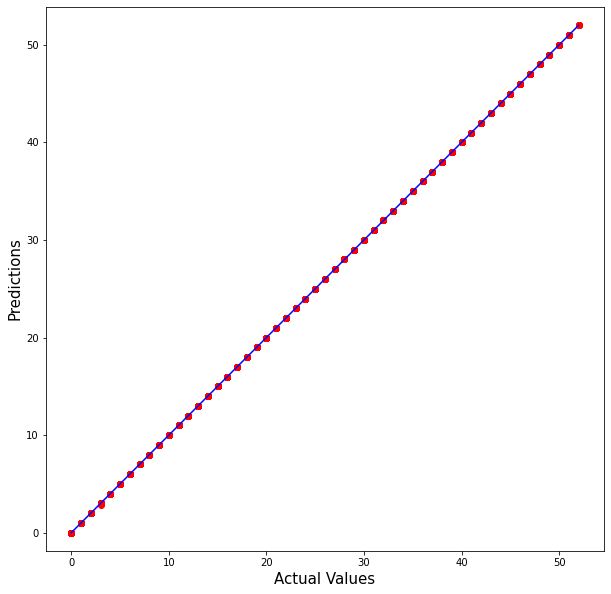

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Gbpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Gbpred), max(y_test))
p2 = min(min(Gbpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Thankyou for watching my project 